Use K-Means to cluster cities into groups

In [94]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA as sklearnPCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

import pandas as pd
import numpy as np

In [95]:
data = pd.read_csv('car_data.csv', encoding='gbk')
data.head(3)

,地区,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量
0,北京,8.05,86.2,95.92,37.71
1,天津,8.34,80.5,103.57,20.62
2,河北,3.39,45.6,99.03,23.32


In [96]:
train_x = data[['人均GDP', '城镇人口比重', '交通工具消费价格指数', '百户拥有汽车量']]
train_x.head(3)

,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量
0,8.05,86.2,95.92,37.71
1,8.34,80.5,103.57,20.62
2,3.39,45.6,99.03,23.32


In [97]:
# Normalize the values to [0, 1]
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1), copy=True)
train_x = min_max_scaler.fit_transform(train_x)
pd.DataFrame(train_x).head(3)

,0,1,2,3
0,0.956716,0.953446,0.000000,1.000000
1,1.000000,0.867848,1.000000,0.472856
2,0.261194,0.343745,0.406536,0.556138


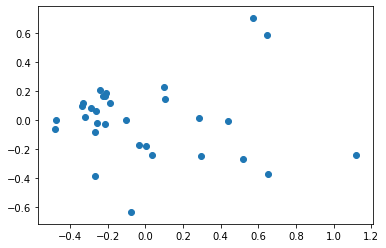

In [98]:
# 使用PCA降维到2D可视化，查看数据是否可以聚类
pca = sklearnPCA(n_components=2) 
transformed = pd.DataFrame(pca.fit_transform(train_x))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(transformed[0], transformed[1])

plt.show()

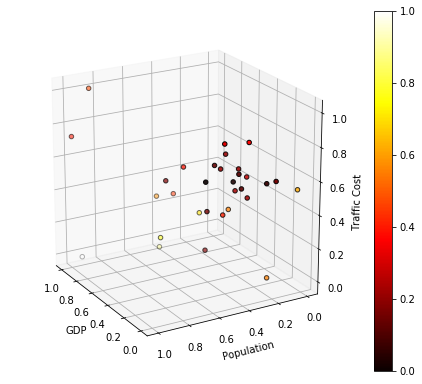

In [99]:
# 3D可视化数据，点的颜色表示百户拥有汽车量
fig = plt.figure(1, figsize=(6, 5))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=150)
image = ax.scatter(train_x[:, 0], train_x[:, 1], train_x[:, 2],
               c=train_x[:, 3], edgecolor='k', cmap=plt.hot())
ax.set_xlabel('GDP')
ax.set_ylabel('Population')
ax.set_zlabel('Traffic Cost')
plt.colorbar(image)
plt.show()

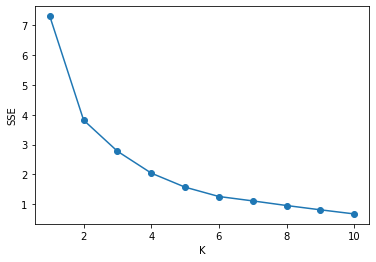

In [100]:
# elbow method to find best K value for K-Means
sse = []
for k in range(1, 11):
	kmeans = KMeans(n_clusters=k)
	kmeans.fit(train_x)
	sse.append(kmeans.inertia_)
x = range(1, 11)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

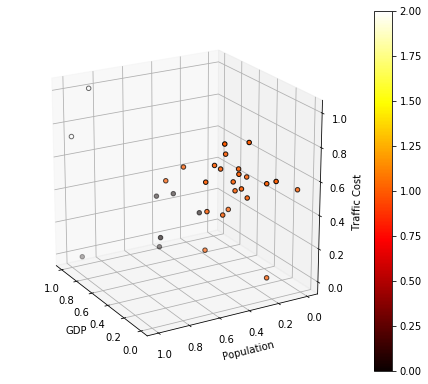

In [101]:
# 根据手肘原则，选择k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(train_x)
predict_y = kmeans.predict(train_x)
fig = plt.figure(1, figsize=(6, 5))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=150)
image = ax.scatter(train_x[:, 0], train_x[:, 1], train_x[:, 2],
               c=predict_y, edgecolor='k', cmap=plt.hot())
ax.set_xlabel('GDP')
ax.set_ylabel('Population')
ax.set_zlabel('Traffic Cost')
plt.colorbar(image)
plt.show()

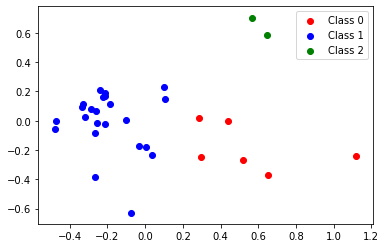

In [102]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(transformed[predict_y==0][0], transformed[predict_y==0][1], label='Class 0', c='red')
ax.scatter(transformed[predict_y==1][0], transformed[predict_y==1][1], label='Class 1', c='blue')
ax.scatter(transformed[predict_y==2][0], transformed[predict_y==2][1], label='Class 2', c='green')

plt.legend()
plt.show()

In [103]:
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)
result.rename({0:u'聚类结果'},axis=1,inplace=True)

In [104]:
# 天津和上海因为交通工具消费价格指数较高且GDP和城镇人口多，被单独划分为一组。
result[(result['交通工具消费价格指数']>100.0) & (result['城镇人口比重']>80.0)]

,地区,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量,聚类结果
1,天津,8.34,80.5,103.57,20.62,2
8,上海,8.18,89.3,101.58,18.15,2


In [105]:
# 北京、浙江、广东等较发达省直辖市被划分为一组。
result[(result['交通工具消费价格指数']<100.0) & (result['人均GDP']>5)]

,地区,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量,聚类结果
0,北京,8.05,86.20,95.92,37.71,0
4,内蒙古,5.79,56.62,99.11,19.62,0
9,江苏,6.22,61.90,98.95,23.92,0
10,浙江,5.92,62.30,96.69,33.85,0
18,广东,5.07,66.50,97.55,30.71,0
